# Room Impulse Responses

<img src="images/wave_in_room.jpg">
<img src="images/room_impulse_response.png">

#### No "response" from the room.

<img src="images/Schalltoter_Raum_TU_Dresden_2009-06-21.jpg">

In [8]:
def play_wav(filename):
    """Plays the wav file with vlc."""
    ! vlc "{filename}"  --play-and-exit

# Better do it like this (suggestion from Leo):
# from IPython.display import Audio
# Audio(sound_file, rate=sample_rate)

In [9]:
play_wav("sounds/test_sounds/voice.wav")

VLC media player 2.1.6 Rincewind (revision 2.1.6-0-gea01d28)
[0x1555058] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.


### Room Impulse Response

<img src="images/minster.jpg">

In [10]:
play_wav("sounds/impulse_responses/minster.wav")

VLC media player 2.1.6 Rincewind (revision 2.1.6-0-gea01d28)
[0x1660058] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
[0x7ff098c02918] main stream error: cannot pre fill buffer


### Simulate the room as Linear System (Filter)

<img src="images/impulse_response.png" width="50%" height="50%">

**The response of the system**
* scales with the input
* is additive 

### Think of a digital signal as a series of impulses

<img src="images/Digital.signal.discret.svg" width="50%" height="50%">

In [11]:
import os
import soundfile as sf
from scipy.signal import fftconvolve
from numpy import abs

def load_wav(file_name):
    """Returns a mono audio signal and sample rate."""
    signal, sample_rate = sf.read(file_name)
    # More than one channel? -> Convert to mono
    if len(signal.shape) > 1:
        signal = signal.mean(axis=1)
    signal = normalize(signal)
    return signal, sample_rate

def normalize(signal):
    """Normalizes the signal to have maximal amplitude 1."""
    return signal / abs(signal).max()

sound_name = "voice.wav"
sound_path = os.path.join("sounds", "test_sounds", sound_name)
sound, sample_rate = load_wav(sound_path)

ror_name = "minster.wav"
ror_path = os.path.join("sounds","impulse_responses", ror_name)
ror, sample_rate_ror = load_wav(ror_path)

new_sound = normalize(fftconvolve(sound, ror))

output_folder = "output_sounds"
output_path = os.path.join(output_folder, sound_name[:-4] + "_conv_" + ror_name)
sf.write(output_path, new_sound, sample_rate)

In [12]:
play_wav(output_path)

VLC media player 2.1.6 Rincewind (revision 2.1.6-0-gea01d28)
[0x216b058] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.


### Lots of "Room" Impulse responses

<img src="images/Washing machine .jpg">
<img src="images/Bath-2.jpg">
<img src="images/Vacuum-cleaner-tube .jpg">

### Avoid typing the filenames...

In [13]:
import os
import re
from pathlib import Path
from enum import Enum

def get_name_from_path(path):
    """Returns a valid python name from the filename."""
    name = os.path.basename(path)
    name = name[:-4]
    name = re.sub("[^a-zA-Z1-9]", "", name)
    # Just prepend an "n" if there is a leanding number 
    if name[0] in "1234567890":
        name = "n" + name
    return name

# "**" works for python 3.4 (in python 2.7 you have to use os.walk)
files = [str(file) for file in Path("sounds").glob('**/*.wav')]
names_to_path = {get_name_from_path(file):file for file in files}
s = Enum("", names_to_path)

In [18]:
import os
import soundfile as sf
from scipy.signal import fftconvolve
from numpy import abs


def convolve_wavs(sound, impulse_response, output_folder="output_sounds"):
    """Convolves the signals from two wav files and writes the output to disk."""
    
    signal1, sample_rate = load_wav(sound.value)    
    signal2, sample_rate_ror = load_wav(impulse_response.value)
    new_sound = normalize(fftconvolve(signal1, signal2))

    output_name = sound.name + "_conv_" + impulse_response.name
    output_path = os.path.join(output_folder, output_name + ".wav")
    print("Writing output to: " + output_path)
    sf.write(output_path, new_sound, sample_rate)
    
    return DuckEnum(output_name, output_path)

class DuckEnum:
    """Has name and value like an Enum => passes the duck test."""
    def __init__(self, name, path):
        self.name = name
        self.value = path

In [17]:
def play_wav(filename):
    """Plays the wav file with vlc."""
    if hasattr(filename, "value"):
        # @Titusz, hasattr seems to behave ok in python 3 (https://hynek.me/articles/hasattr/)
        filename = filename.value
    ! vlc "{filename}"  --play-and-exit

In [19]:
play_wav(convolve_wavs(s.voice, s.Vacuumcleanertubemono))

Writing output to: output_sounds/voice_conv_Vacuumcleanertubemono.wav
VLC media player 2.1.6 Rincewind (revision 2.1.6-0-gea01d28)
[0x23e7058] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.


#### We can compose the convolution

In [20]:
from functools import reduce

sound_list = [s.voice, s.Telephone9s, s.Washingmachinemono, s.minster]
play_wav(reduce(convolve_wavs, sound_list))

Writing output to: output_sounds/voice_conv_Telephone9s.wav
Writing output to: output_sounds/voice_conv_Telephone9s_conv_Washingmachinemono.wav
Writing output to: output_sounds/voice_conv_Telephone9s_conv_Washingmachinemono_conv_minster.wav
VLC media player 2.1.6 Rincewind (revision 2.1.6-0-gea01d28)
[0x1b5a058] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.


In [21]:
# another test sound
play_wav(s.guitar)
play_wav(convolve_wavs(s.guitar, s.minster))
play_wav(convolve_wavs(s.guitar, s.WalkmanEQ))

VLC media player 2.1.6 Rincewind (revision 2.1.6-0-gea01d28)
[0x22a4058] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
Writing output to: output_sounds/guitar_conv_minster.wav
VLC media player 2.1.6 Rincewind (revision 2.1.6-0-gea01d28)
[0x19c6058] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
Writing output to: output_sounds/guitar_conv_WalkmanEQ.wav
VLC media player 2.1.6 Rincewind (revision 2.1.6-0-gea01d28)
[0x1eb1058] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.


### Optional: Lets look at the signals

In [22]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = 10.0, 8.0

<IPython.core.display.Javascript object>


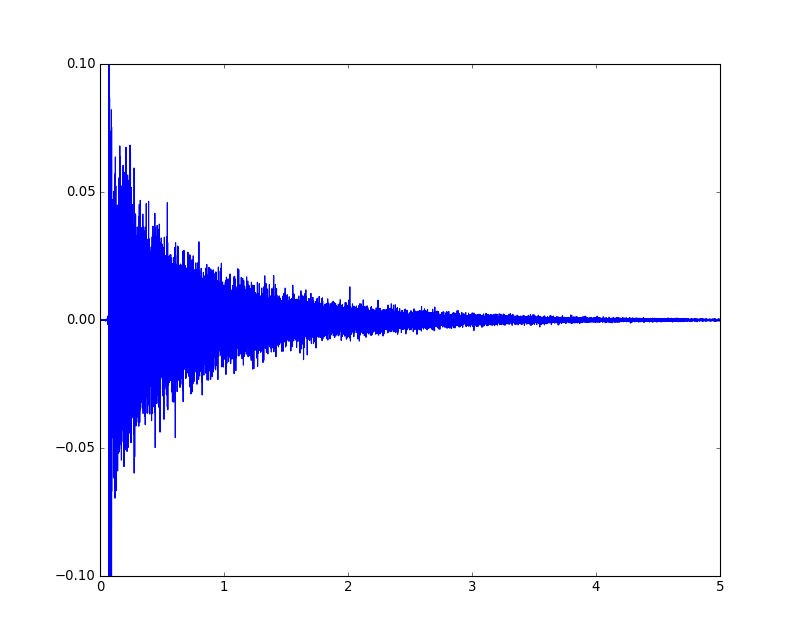

(0, 5)

In [23]:
import matplotlib.pylab as plt
import numpy as np

plt.figure()
period = 1 / sample_rate_ror
t = np.arange(0, len(ror)) * period
plt.plot(t, ror)
plt.ylim([-0.1, 0.1])
plt.xlim([0, 5])

<IPython.core.display.Javascript object>


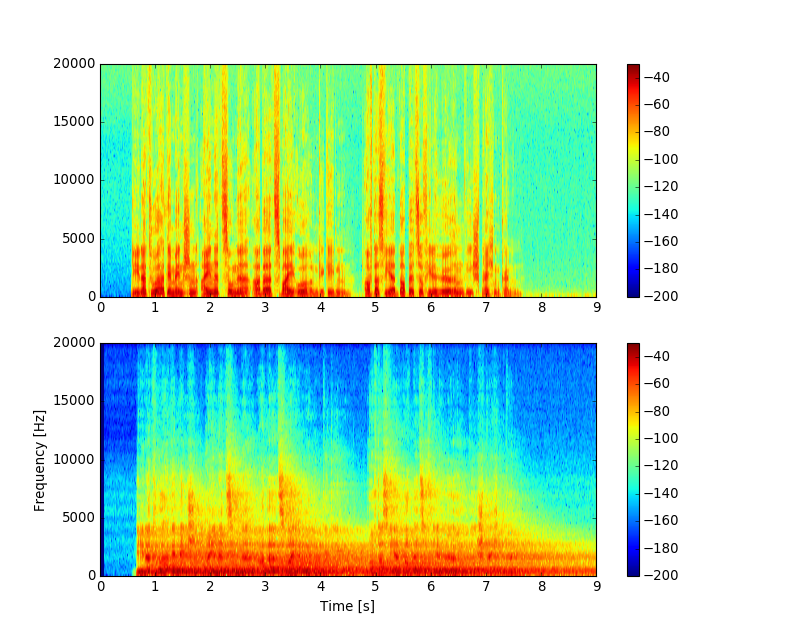

In [24]:
plt.figure()
for i, signal in enumerate([sound, new_sound]):
    plt.subplot(2, 1, i+1)
    plt.specgram(signal, Fs=sample_rate)
    plt.xlim([0, 9])
    plt.ylim([0, 20000])
    plt.colorbar()
    plt.clim(-30,-200)

plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")

<IPython.core.display.Javascript object>


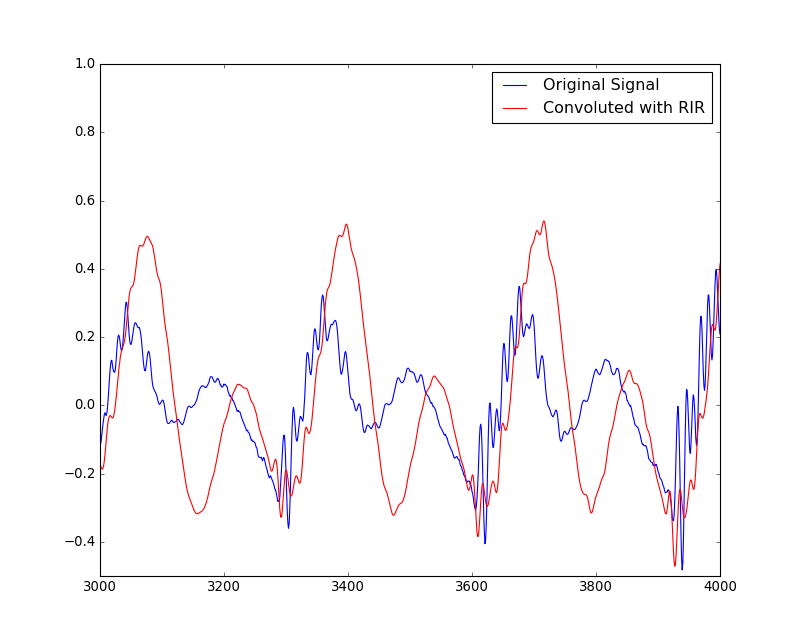

In [25]:
# The sounds have now different offsets, define the start
# of the sound when the signal exceeds a threshold
threshold = 0.02
start_new = np.where(abs(new_sound) > threshold)[0][0]
start_orig = np.where(abs(sound) > threshold)[0][0]

plt.figure()
plt.plot(sound[start_orig:],"b")
plt.plot(new_sound[start_new:],"r")
plt.ylim([-0.5, 1])
plt.xlim([3000, 4000])
plt.legend(["Original Signal", "Convoluted with RIR"])

### References

* Idea from "Digital Signal Processing" course by EPFL on http://coursera.org
* Images
    * Wave in a room http://www-users.york.ac.uk/~dtm3/RS/RSweb.htm
    * Room impulse response image http://dx.doi.org/10.3390/buildings4020113
    * Impulse response concept image http://cnx.org/contents/K-YPqibx@4/Modelling-Corruption
    * Digital signal https://commons.wikimedia.org/wiki/File%3ADigital.signal.discret.svg
    * Anechoic chamber https://commons.wikimedia.org/wiki/File:Schalltoter_Raum_TU_Dresden_2009-06-21.jpg
* Sounds
    * Voice and other test sounds https://tech.ebu.ch/publications/sqamcd
    * York Minster impulse response http://www.openairlib.net/auralizationdb/content/york-minster
    * All other impulse responses http://fokkie.home.xs4all.nl/IR.htm 
        * Files converted files to wav http://duc.avid.com/showthread.php?t=262864